In [1]:
import numpy as np
import h5py
import hdf5plugin
import os
import seaborn as sns

sns.set()


In [2]:

h5_path = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/mm10/modisco_l1_counts_ss/endothelial_cell/modisco_results.h5"

In [3]:
h5_data = h5py.File(h5_path, 'r')
h5_data.keys()

<KeysViewHDF5 ['pos_patterns']>

In [18]:
def aggregate_pattern_starts(h5_data, pattern_type, pattern_name):
    pattern = h5_data[pattern_type][pattern_name]["seqlets"]
    # pos = pattern["start"][:] - 1057
    # print(pos[:5])
    pos_if_fc = pattern["start"][:] - 200
    pos_if_rc = 400 - pattern["end"][:] - 1 - 200 
    
    mask_rc = pattern["is_revcomp"][:].astype(int)
    mask_fc = 1 - mask_rc

    pos = pos_if_fc * mask_fc + pos_if_rc * mask_rc

    return pos
    

In [19]:
# def aggregate_pattern_starts(h5_data, pattern_type, pattern_name):
#     pattern = h5_data[pattern_type][pattern_name]["seqlets"]
#     pos = pattern["start"][:]

#     return pos
    

In [24]:
pattern_type = "pos_patterns"
pattern_name = "pattern_1"

In [25]:
pos = aggregate_pattern_starts(h5_data, pattern_type, pattern_name)

(-200.0, 200.0)

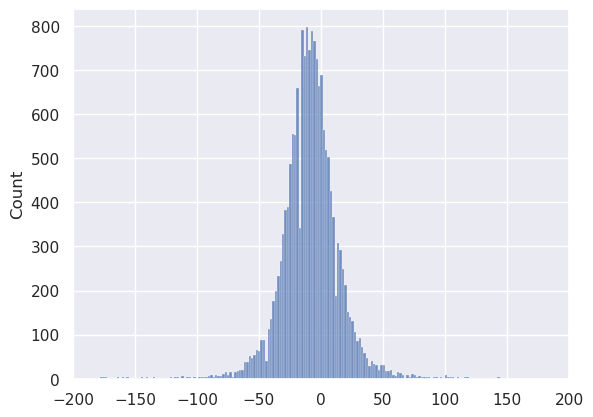

In [26]:
ax = sns.histplot(data=pos)
ax.set_xlim(-200, 200)